<a href="https://colab.research.google.com/github/bkrant/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 25.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [2]:
sns.__version__

'0.9.0'

In [4]:
# https://catalog.data.gov/dataset/births-birth-rates-and-fertility-rates-by-race-of-mother-united-states-1960-2013
df = pd.read_csv('https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD')
print(df.shape)
df.head()

(422, 5)


,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,White,3600744,22.7,113.2
1,1961,White,3600864,22.2,112.3
2,1962,White,3394068,21.4,107.5
3,1963,White,3326344,20.7,103.6
4,1964,White,3369160,20.0,99.8


In [8]:
df.isnull().sum()

Year               0
Race               0
Live Births        0
Birth Rate        23
Fertility Rate    23
dtype: int64

In [88]:
df.dtypes

Year               object
Race               object
Live Births         int64
Birth Rate        float64
Fertility Rate    float64
dtype: object

In [0]:
df.corr()

,Year,Live Births,Birth Rate,Fertility Rate
Year,1.000000,-0.071939,-0.579570,-0.627854
Live Births,-0.071939,1.000000,-0.262462,0.013155
Birth Rate,-0.579570,-0.262462,1.000000,0.909135
Fertility Rate,-0.627854,0.013155,0.909135,1.000000


In [0]:
df.describe()

,Year,Live Births,Birth Rate,Fertility Rate
count,422.000000,4.220000e+02,399.000000,399.000000
mean,1993.919431,1.529754e+06,16.379198,70.831830
std,14.823047,1.547940e+06,3.714990,15.445038
min,1960.000000,2.111400e+04,9.700000,43.900000
25%,1985.000000,1.616592e+05,14.000000,62.750000
50%,1996.000000,6.330175e+05,15.700000,66.100000
75%,2006.000000,3.120435e+06,18.300000,74.150000
max,2015.000000,4.316233e+06,31.900000,153.500000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


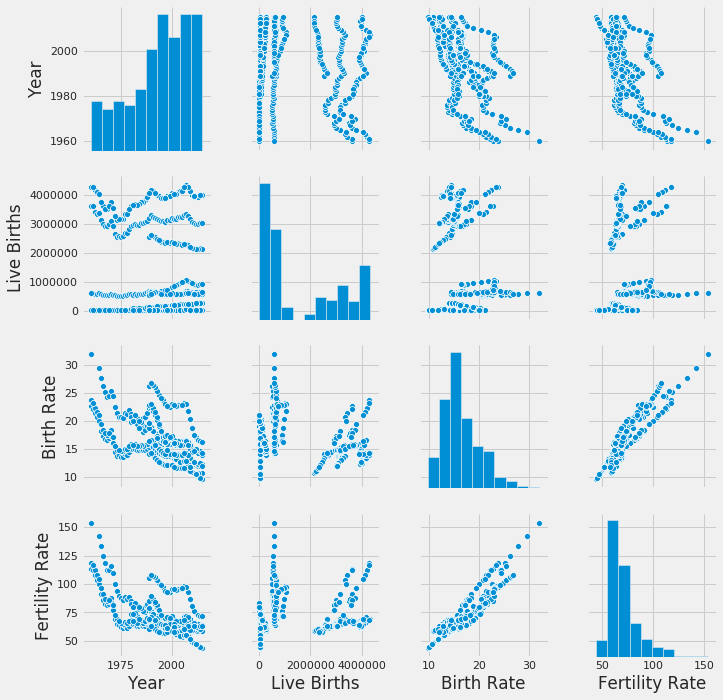

In [52]:
sns.pairplot(df);

In [23]:
max(df['Year']), max(df['Fertility Rate'])

(2015, 153.5)

In [22]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}
#plt.text(.4,.4, 'White', fontdict=font) 
plt.rcParams['figure.figsize']=(25,10)
p1 = sns.lineplot(x="Year", y="Birth Rate", hue="Race", data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])])
#p1.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
  
p1.text(200,500, 'your text here', fontdict=font, horizontalalignment='left');

Error in callback <function flush_figures at 0x7f472d8df2f0> (for post_execute):


KeyboardInterrupt: ignored

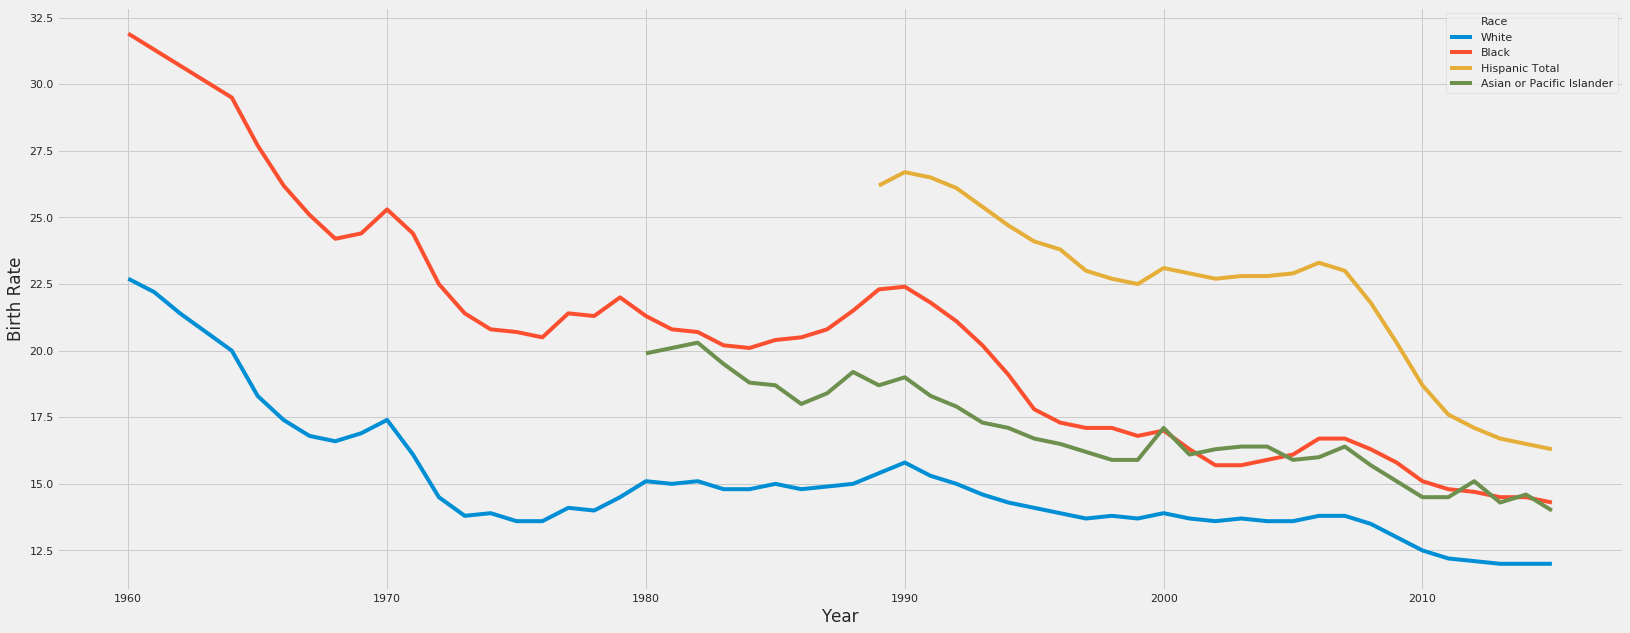

In [94]:
plt.rcParams['figure.figsize']=(25,10)
sns.lineplot(x="Year", y="Birth Rate", hue="Race", data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])]);

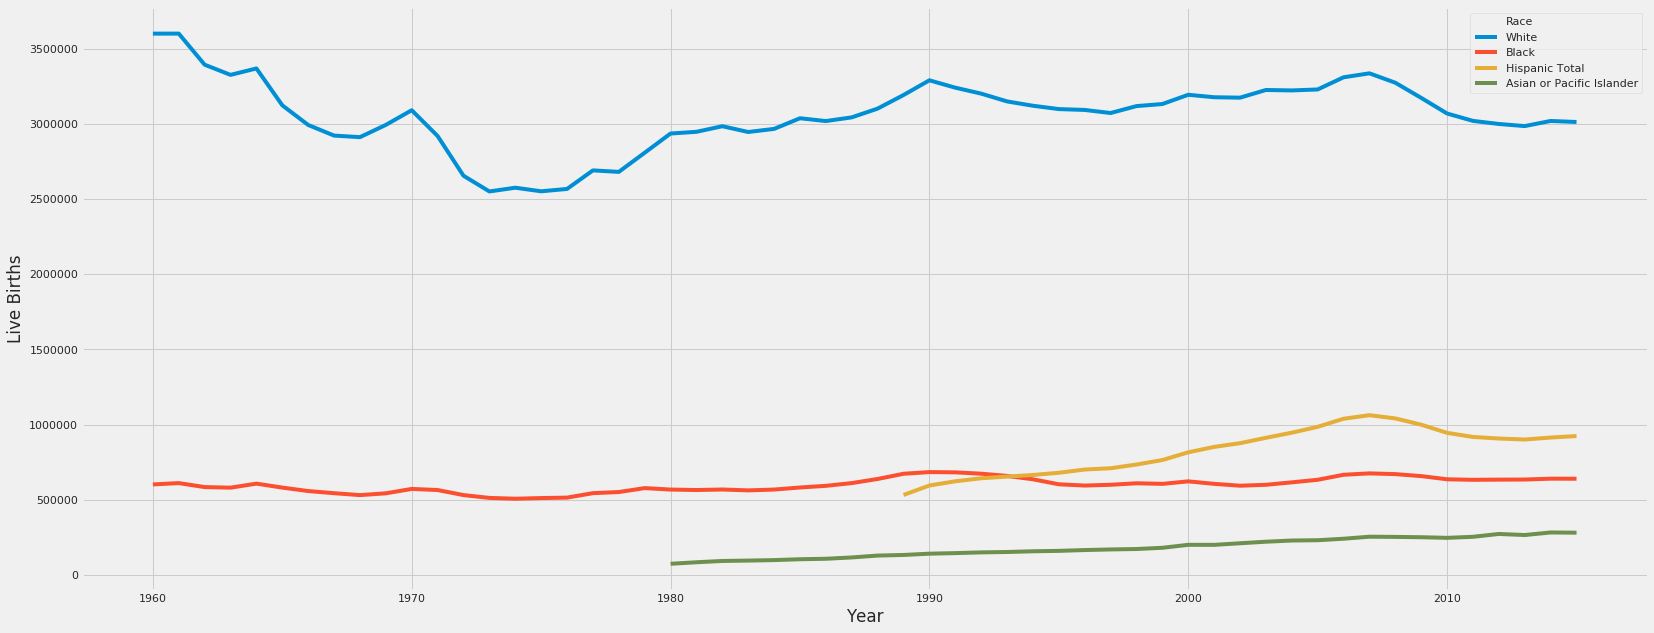

In [54]:
plt.rcParams['figure.figsize']=(25,10)
sns.lineplot(x="Year", y="Live Births", hue="Race", data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])]);

In [105]:
df['Fertility Rate'].value_counts(bins=20).sort_index()

(43.789, 49.38]      12
(49.38, 54.86]       10
(54.86, 60.34]       44
(60.34, 65.82]      126
(65.82, 71.3]        91
(71.3, 76.78]        24
(76.78, 82.26]       22
(82.26, 87.74]       20
(87.74, 93.22]       11
(93.22, 98.7]        12
(98.7, 104.18]        6
(104.18, 109.66]      7
(109.66, 115.14]      6
(115.14, 120.62]      4
(120.62, 126.1]       1
(126.1, 131.58]       0
(131.58, 137.06]      1
(137.06, 142.54]      0
(142.54, 148.02]      1
(148.02, 153.5]       1
Name: Fertility Rate, dtype: int64

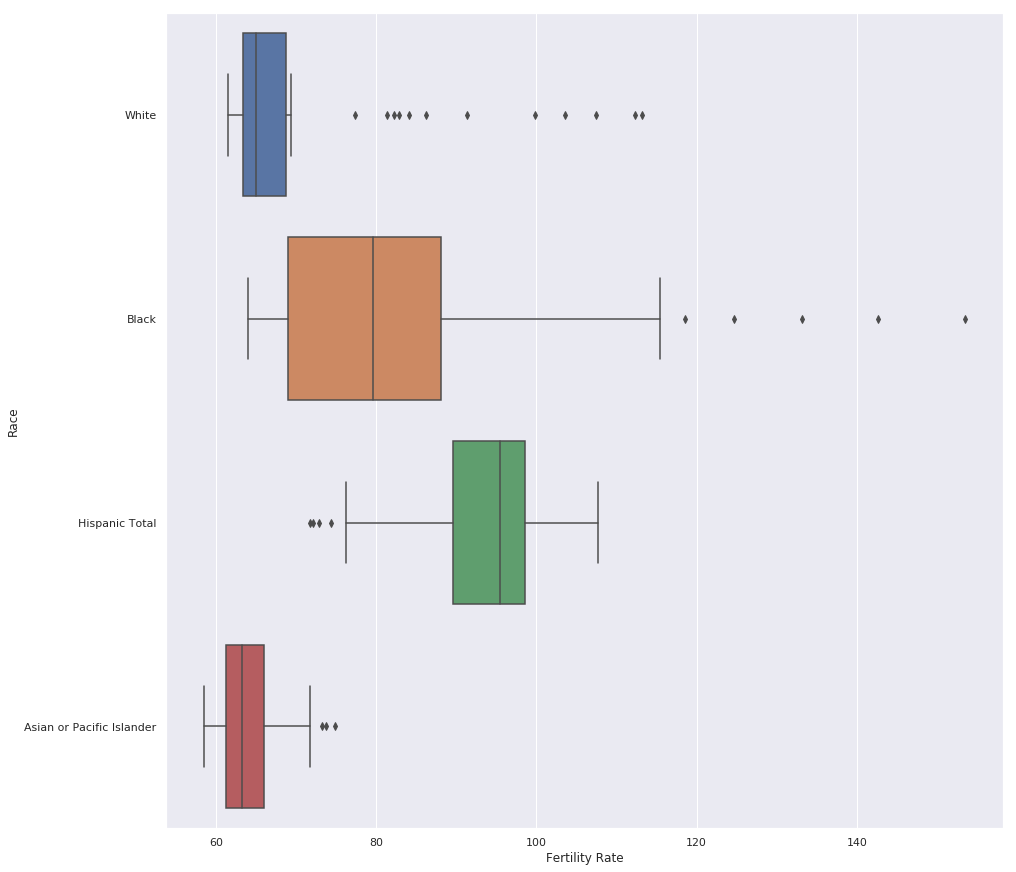

In [122]:
plt.rcParams['figure.figsize']=(15,15)
sns.boxplot('Fertility Rate','Race', data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])]);

In [18]:
table = pd.pivot_table(df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], values='Fertility Rate', index=['Race'], columns=['Year'], aggfunc=np.mean)
table

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Race,,,,,,,,,,,,,,,,,,,,,
Asian or Pacific Islander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.7,65.3,63.3,61.3,59.2,59.9,62.2,59.2,60.7,58.5
Black,153.5,NaN,NaN,NaN,142.6,133.2,124.7,118.5,112.7,112.1,...,71.4,71.7,70.6,68.8,66.3,65.5,65.1,64.7,64.6,64.0
Hispanic Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.3,97.4,92.7,86.5,80.2,76.2,74.4,72.9,72.1,71.7
White,113.2,112.3,107.5,103.6,99.8,91.3,86.2,82.8,81.3,82.2,...,68.7,69.4,68.3,66.4,64.4,63.4,63.0,62.7,63.2,63.1


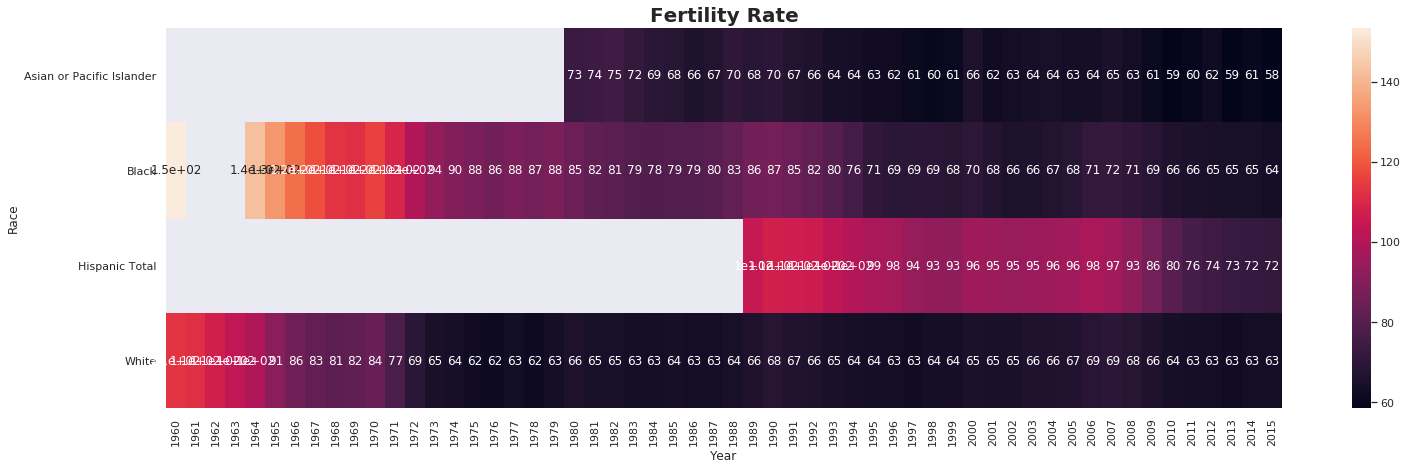

In [19]:
plt.rcParams['figure.figsize']=(25,7)
sns.heatmap(table, annot=True)
plt.title('Fertility Rate', fontsize=20, fontweight='bold');

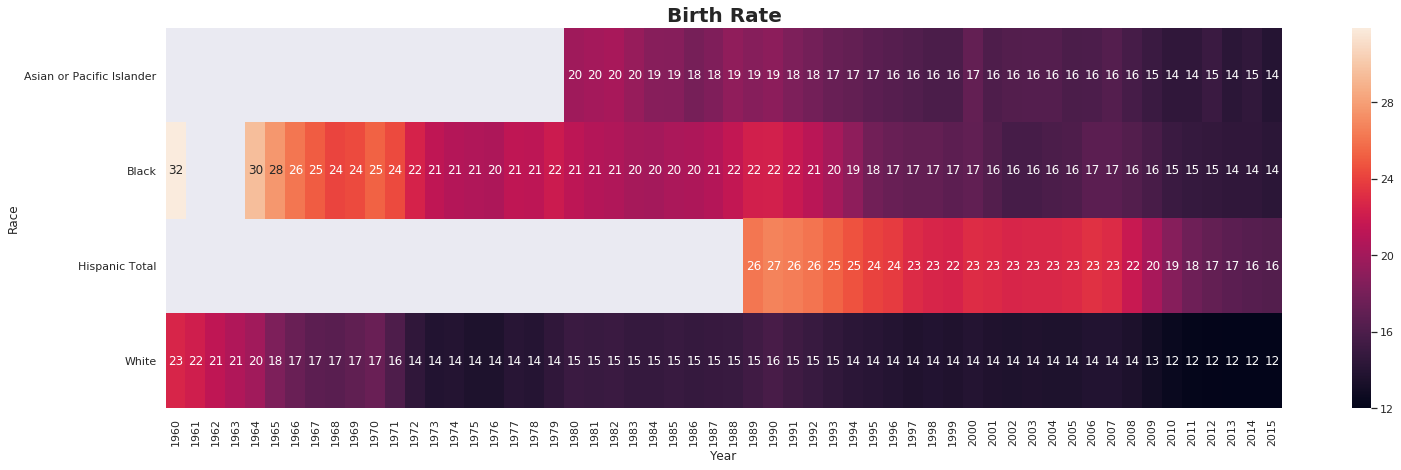

In [24]:
plt.rcParams['figure.figsize']=(25,7)
sns.heatmap(pd.pivot_table(df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], values='Birth Rate', index=['Race'], columns=['Year'], aggfunc=np.mean), annot=True)
plt.title('Birth Rate', fontsize=20, fontweight='bold');

In [123]:
df.head(2)

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,White,3600744,22.7,113.2
1,1961,White,3600864,22.2,112.3
